## Import Packages and load data from YFinance

In [1]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta

## Fetch dividends, collect interest rate and expected inflation data

In [2]:
ROOT_BASE = "/Users/alejandromarcano/Finance/PredictingStockPrice/data/"
interest_rates_url = ROOT_BASE + "hb2-daily.xlsx"
inflation_expectations_url = ROOT_BASE + "hm14.xlsx"
df = pd.read_excel(interest_rates_url)
df2 = pd.read_excel(inflation_expectations_url)

In [3]:
# Use this code if you need all tickers
# url = 'https://www.interest.co.nz/nzx50'
# nzx50 = pd.read_html(url,  flavor='html5lib')[0]
# symbols_list = nzx50["Profile"].unique().tolist()
# del symbols_list[-1]
# symbols_list_nz = [symbol + ".NZ" for symbol in symbols_list]
# symbols_list_nz = [s.replace('FHP.NZ', 'FPH.NZ') for s in symbols_list_nz] # had to change ticker to match yfinance ticker for FHP

In [4]:
interest_df = df.loc[4:, ["Unnamed: 0", "Cash rate"]] # Use only dates and cash rate column from excel file for new df
interest_df.columns = ['Date', 'Interest Rate'] # change column names to Date and Interest rate
interest_df['Date'] = pd.to_datetime(interest_df['Date']) # Change date information to pandas datetime

In [5]:
energy_stocks = ["MEL.NZ", "MCY.NZ", "CEN.NZ", "GNE.NZ"]

## Aggregate on a monthly level the daily interest rates
* Using the mean, get the mean of the interest rate for the month

In [6]:
interest_df.set_index('Date', inplace=True)

# Aggregate to monthly level
monthly_interest_rate_data = interest_df.resample('ME').mean()  # You can use 'sum', 'mean', 'max', 'min', etc. depending on your aggregation needs

# Reset index to make 'Date' a column again (if desired)
monthly_interest_rate_data.reset_index(inplace=True)

# Print or view the aggregated data
print(monthly_interest_rate_data)

         Date Interest Rate
0  2018-01-31          1.75
1  2018-02-28          1.75
2  2018-03-31          1.75
3  2018-04-30          1.75
4  2018-05-31          1.75
..        ...           ...
73 2024-02-29           5.5
74 2024-03-31           5.5
75 2024-04-30           5.5
76 2024-05-31           5.5
77 2024-06-30           5.5

[78 rows x 2 columns]


In [7]:
## Work with 2 years of data ending on May 2024
# Define the specific date
specific_date = datetime(2024, 3, 1)

# Calculate the date two years ago
two_years_ago = specific_date - timedelta(days=2*365)
df_interest_filtered = monthly_interest_rate_data[
    (monthly_interest_rate_data['Date'] >= two_years_ago) & 
    (monthly_interest_rate_data['Date'] <= datetime(2024, 4, 1))
]

In [8]:
df_interest_filtered

,Date,Interest Rate
50,2022-03-31,1.0
51,2022-04-30,1.25
52,2022-05-31,1.590909
53,2022-06-30,2.0
54,2022-07-31,2.285714
55,2022-08-31,2.717391
56,2022-09-30,3.0
57,2022-10-31,3.425
58,2022-11-30,3.670455
59,2022-12-31,4.25


## Create new data frame with only date and annual cpi growth (expected inflation 1 year out)

In [9]:
expected_interest_df = df2.loc[4:, ["Unnamed: 0", "Annual CPI growth"]]
expected_interest_df.columns = ['Date', 'Expected 1 Year Interest Rate']
expected_interest_df['Date'] = pd.to_datetime(expected_interest_df['Date'])
expected_interest_df.set_index('Date', inplace=True)
expected_interest_df['Expected 1 Year Interest Rate'] = pd.to_numeric(expected_interest_df['Expected 1 Year Interest Rate'])
# Resample to monthly frequency and interpolate using linear method
df_expected_monthly = expected_interest_df.resample('ME').interpolate(method='linear')

# Reset index to make 'Date' a column again
df_expected_monthly.reset_index(inplace=True)

# Display the resulting DataFrame
print(df_expected_monthly)

          Date  Expected 1 Year Interest Rate
0   1987-09-30                       9.800000
1   1987-10-31                       9.500000
2   1987-11-30                       9.200000
3   1987-12-31                       8.900000
4   1988-01-31                       8.500000
..         ...                            ...
437 2024-02-29                       3.346667
438 2024-03-31                       3.220000
439 2024-04-30                       3.056667
440 2024-05-31                       2.893333
441 2024-06-30                       2.730000

[442 rows x 2 columns]


### Expected inflation rate is 1 year out. Therefore, I moved the dates 1 year forward to make the expected inflation rate match the expected date

In [10]:
df_expected_monthly['Date'] = df_expected_monthly['Date'] + pd.DateOffset(years=1)

df_expected_interest_filtered = df_expected_monthly[
    (df_expected_monthly['Date'] >= two_years_ago) & 
    (df_expected_monthly['Date'] <= datetime(2024, 4, 1))
]

# Display the filtered data frame
print(df_expected_interest_filtered)

          Date  Expected 1 Year Interest Rate
402 2022-03-31                       1.730000
403 2022-04-30                       1.776667
404 2022-05-31                       1.823333
405 2022-06-30                       1.870000
406 2022-07-31                       2.253333
407 2022-08-31                       2.636667
408 2022-09-30                       3.020000
409 2022-10-31                       3.246667
410 2022-11-30                       3.473333
411 2022-12-31                       3.700000
412 2023-01-31                       3.933333
413 2023-02-28                       4.166667
414 2023-03-31                       4.400000
415 2023-04-30                       4.560000
416 2023-05-31                       4.720000
417 2023-06-30                       4.880000
418 2023-07-31                       4.873333
419 2023-08-31                       4.866667
420 2023-09-30                       4.860000
421 2023-10-31                       4.933333
422 2023-11-30                    

In [11]:
# adjust February column
df_expected_interest_filtered.loc[df_expected_interest_filtered['Date'] == '2024-02-28', 'Date'] = '2024-02-29'

In [12]:
df_expected_interest_filtered

,Date,Expected 1 Year Interest Rate
402,2022-03-31,1.730000
403,2022-04-30,1.776667
404,2022-05-31,1.823333
405,2022-06-30,1.870000
406,2022-07-31,2.253333
407,2022-08-31,2.636667
408,2022-09-30,3.020000
409,2022-10-31,3.246667
410,2022-11-30,3.473333
411,2022-12-31,3.700000


## Fetch Dividends

In [13]:
def fetch_dividends(ticker_symbols):
    dividends_data = {}
    for symbol in ticker_symbols:
        try:
            ticker = yf.Ticker(symbol)
            dividends = ticker.dividends
            dividends_data[symbol] = dividends
        except Exception as e:
            print(f"Error fetching data for {symbol}: {e}")
    return dividends_data

In [14]:
# Find data from yfinance and convert to csv file
energy_dividends_data = fetch_dividends(energy_stocks)
energy_dividends_data = pd.DataFrame(energy_dividends_data) # convert to DataFrame
energy_dividends_data.to_csv("energy_dividend.csv")

In [15]:
df_dividends = pd.read_csv(ROOT_BASE + "energy_dividend.csv")
df_dividends["Date"] =  pd.to_datetime(df_dividends['Date'], utc=True).dt.date # convert date into pandas datetime
df_dividends.ffill(inplace=True)  # Forward fill
df_dividends

,Date,MEL.NZ,MCY.NZ,CEN.NZ,GNE.NZ
0,2009-03-10,NaN,NaN,0.096877,NaN
1,2009-08-30,NaN,NaN,0.149719,NaN
2,2010-03-09,NaN,NaN,0.096877,NaN
3,2010-08-31,NaN,NaN,0.123298,NaN
4,2011-03-08,NaN,NaN,0.099253,NaN
...,...,...,...,...,...
87,2023-09-20,0.1190,0.131,0.210000,0.088
88,2024-02-25,0.1190,0.131,0.140000,0.088
89,2024-03-07,0.0615,0.131,0.140000,0.088
90,2024-03-12,0.0615,0.093,0.140000,0.088


## Filter dividends for the last 2 years 

In [16]:
df_dividends['Date'] = pd.to_datetime(df_dividends['Date'])
current_date = pd.Timestamp('2024-04-01')  # Example of a fixed current date
two_years_ago = current_date - pd.DateOffset(years=2, months=6)
filtered_dividends_df = df_dividends[df_dividends['Date'] >= two_years_ago]

In [17]:
filtered_dividends_df

,Date,MEL.NZ,MCY.NZ,CEN.NZ,GNE.NZ
73,2022-03-09,0.112000,0.102,0.140000,0.088
74,2022-03-15,0.112000,0.080,0.140000,0.088
75,2022-03-16,0.058500,0.080,0.140000,0.087
76,2022-09-06,0.149637,0.080,0.140000,0.087
77,2022-09-07,0.149637,0.080,0.283889,0.087
78,2022-09-13,0.149637,0.120,0.283889,0.087
79,2022-09-21,0.149637,0.120,0.283889,0.089
80,2023-03-06,0.060000,0.120,0.283889,0.089
81,2023-03-08,0.060000,0.120,0.140000,0.089
82,2023-03-14,0.060000,0.087,0.140000,0.089


In [18]:
filtered_dividends_df.columns

Index(['Date', 'MEL.NZ', 'MCY.NZ', 'CEN.NZ', 'GNE.NZ'], dtype='object')

In [19]:
# Set Date as index
filtered_dividends_df.set_index('Date', inplace=True)

# Resample data by month and sum the dividends, filling missing months with zero
monthly_dividends = filtered_dividends_df.resample('ME').sum().fillna(0)

In [20]:
monthly_dividends

,MEL.NZ,MCY.NZ,CEN.NZ,GNE.NZ
Date,,,,
2022-03-31,0.282500,0.262,0.420000,0.263
2022-04-30,0.000000,0.000,0.000000,0.000
2022-05-31,0.000000,0.000,0.000000,0.000
2022-06-30,0.000000,0.000,0.000000,0.000
2022-07-31,0.000000,0.000,0.000000,0.000
2022-08-31,0.000000,0.000,0.000000,0.000
2022-09-30,0.598548,0.400,0.991667,0.350
2022-10-31,0.000000,0.000,0.000000,0.000
2022-11-30,0.000000,0.000,0.000000,0.000


## Merge dividends dataframe, expected interest rate, daily interest rates

In [21]:
merged_df = pd.merge(df_interest_filtered, df_expected_interest_filtered, on='Date', how='inner')
all_merged_df = pd.merge(merged_df, monthly_dividends, on='Date', how='inner')
print(all_merged_df)

         Date Interest Rate  Expected 1 Year Interest Rate    MEL.NZ  MCY.NZ  \
0  2022-03-31           1.0                       1.730000  0.282500   0.262   
1  2022-04-30          1.25                       1.776667  0.000000   0.000   
2  2022-05-31      1.590909                       1.823333  0.000000   0.000   
3  2022-06-30           2.0                       1.870000  0.000000   0.000   
4  2022-07-31      2.285714                       2.253333  0.000000   0.000   
5  2022-08-31      2.717391                       2.636667  0.000000   0.000   
6  2022-09-30           3.0                       3.020000  0.598548   0.400   
7  2022-10-31         3.425                       3.246667  0.000000   0.000   
8  2022-11-30      3.670455                       3.473333  0.000000   0.000   
9  2022-12-31          4.25                       3.700000  0.000000   0.000   
10 2023-01-31          4.25                       3.933333  0.000000   0.000   
11 2023-02-28      4.355263             

## Collect closing prices of the stocks

In [22]:
end_date = '2024-03-31'

start_date = pd.to_datetime(end_date)-pd.DateOffset(365*2 + 31) # use last 2 years of data

stocks_df = yf.download(tickers=energy_stocks,
                 start=start_date,
                 end=end_date)

adj_close_stocks = stocks_df['Adj Close']

[*********************100%%**********************]  4 of 4 completed


In [23]:
adj_close_stocks

Ticker,CEN.NZ,GNE.NZ,MCY.NZ,MEL.NZ
Date,,,,
2022-03-01,7.444935,2.375120,5.303014,4.818033
2022-03-02,7.355774,2.392208,5.376667,4.863919
2022-03-03,7.293362,2.452013,5.376667,4.790502
2022-03-04,7.239864,2.477643,5.376667,4.799678
2022-03-07,7.177452,2.469100,5.349047,4.735438
...,...,...,...,...
2024-03-22,8.410000,2.390000,6.780000,5.940000
2024-03-25,8.340000,2.380000,6.850000,5.920000
2024-03-26,8.530000,2.400000,6.800000,5.850000


In [24]:
## convert to CSV file 
adj_close_stocks.to_csv("energy_adj_price.csv")

In [25]:
adj_close_stocks

Ticker,CEN.NZ,GNE.NZ,MCY.NZ,MEL.NZ
Date,,,,
2022-03-01,7.444935,2.375120,5.303014,4.818033
2022-03-02,7.355774,2.392208,5.376667,4.863919
2022-03-03,7.293362,2.452013,5.376667,4.790502
2022-03-04,7.239864,2.477643,5.376667,4.799678
2022-03-07,7.177452,2.469100,5.349047,4.735438
...,...,...,...,...
2024-03-22,8.410000,2.390000,6.780000,5.940000
2024-03-25,8.340000,2.380000,6.850000,5.920000
2024-03-26,8.530000,2.400000,6.800000,5.850000


In [26]:
# read data from csv file
adj_close_stocks = pd.read_csv(ROOT_BASE + "energy_adj_price.csv")

In [27]:
## Agregate data using mean 
# Convert 'Date' column to datetime
adj_close_stocks['Date'] = pd.to_datetime(adj_close_stocks['Date'])
# Set 'Date' as the index
adj_close_stocks.set_index('Date', inplace=True)
monthly_mean_adj_close = adj_close_stocks.resample('ME').mean()
print(monthly_mean_adj_close)

              CEN.NZ    GNE.NZ    MCY.NZ    MEL.NZ
Date                                              
2022-03-31  7.220767  2.458332  5.340498  4.722647
2022-04-30  7.272596  2.496455  5.611586  4.548404
2022-05-31  6.960307  2.394435  5.368049  4.239733
2022-06-30  6.663740  2.285384  5.224162  4.246947
2022-07-31  6.694221  2.447576  5.482227  4.465934
2022-08-31  7.066763  2.604677  5.859765  4.789072
2022-09-30  7.316672  2.595272  5.636205  4.742130
2022-10-31  6.813124  2.467983  5.106709  4.461451
2022-11-30  6.973525  2.463191  5.247371  4.501008
2022-12-31  7.307367  2.367328  5.303423  4.877672
2023-01-31  7.371792  2.464348  5.528478  5.060426
2023-02-28  7.229130  2.583527  5.998441  5.142953
2023-03-31  7.202797  2.555163  6.012366  5.023600
2023-04-30  7.359176  2.574719  6.034840  5.085073
2023-05-31  7.601153  2.560531  6.202336  5.251596
2023-06-30  7.582845  2.565254  6.183660  5.244444
2023-07-31  7.833615  2.533943  6.255497  5.330077
2023-08-31  8.026424  2.412793 

In [28]:
# Creates a scv file for interest rate and expected inflation dataframe
# merged_df.to_csv("interest_inflation_features.csv")

In [29]:
## Create a dataframe for each energy stock with the features and adj close price of each stock
# adjclose_cen = monthly_mean_adj_close["CEN.NZ"]
# features_cen = all_merged_df[["Interest Rate", "Expected 1 Year Interest Rate", "CEN.NZ"]]



In [30]:
all_merged_df['Date'] = pd.to_datetime(all_merged_df['Date'])
all_merged_df.columns

Index(['Date', 'Interest Rate', 'Expected 1 Year Interest Rate', 'MEL.NZ',
       'MCY.NZ', 'CEN.NZ', 'GNE.NZ'],
      dtype='object')

In [31]:
# monthly_mean_adj_close['Date'] = pd.to_datetime(monthly_mean_adj_close['Date'])
monthly_mean_adj_close = monthly_mean_adj_close.reset_index()
print(monthly_mean_adj_close.head())

        Date    CEN.NZ    GNE.NZ    MCY.NZ    MEL.NZ
0 2022-03-31  7.220767  2.458332  5.340498  4.722647
1 2022-04-30  7.272596  2.496455  5.611586  4.548404
2 2022-05-31  6.960307  2.394435  5.368049  4.239733
3 2022-06-30  6.663740  2.285384  5.224162  4.246947
4 2022-07-31  6.694221  2.447576  5.482227  4.465934


## CEN.NZ Dataframe

In [32]:
# Merge the dataframes on the Date column
df_cen = pd.merge(all_merged_df[['Date', 'Interest Rate', 'Expected 1 Year Interest Rate', 'CEN.NZ']], monthly_mean_adj_close[['Date', 'CEN.NZ']], on='Date')

In [33]:
df_cen

,Date,Interest Rate,Expected 1 Year Interest Rate,CEN.NZ_x,CEN.NZ_y
0,2022-03-31,1.0,1.730000,0.420000,7.220767
1,2022-04-30,1.25,1.776667,0.000000,7.272596
2,2022-05-31,1.590909,1.823333,0.000000,6.960307
3,2022-06-30,2.0,1.870000,0.000000,6.663740
4,2022-07-31,2.285714,2.253333,0.000000,6.694221
5,2022-08-31,2.717391,2.636667,0.000000,7.066763
6,2022-09-30,3.0,3.020000,0.991667,7.316672
7,2022-10-31,3.425,3.246667,0.000000,6.813124
8,2022-11-30,3.670455,3.473333,0.000000,6.973525
9,2022-12-31,4.25,3.700000,0.000000,7.307367


In [34]:
df_gne = pd.merge(all_merged_df[['Date', 'Interest Rate', 'Expected 1 Year Interest Rate', 'GNE.NZ']], monthly_mean_adj_close[['Date', 'GNE.NZ']], on='Date')

## GNE.NZ Dataframe

In [35]:
df_gne

,Date,Interest Rate,Expected 1 Year Interest Rate,GNE.NZ_x,GNE.NZ_y
0,2022-03-31,1.0,1.730000,0.263,2.458332
1,2022-04-30,1.25,1.776667,0.000,2.496455
2,2022-05-31,1.590909,1.823333,0.000,2.394435
3,2022-06-30,2.0,1.870000,0.000,2.285384
4,2022-07-31,2.285714,2.253333,0.000,2.447576
5,2022-08-31,2.717391,2.636667,0.000,2.604677
6,2022-09-30,3.0,3.020000,0.350,2.595272
7,2022-10-31,3.425,3.246667,0.000,2.467983
8,2022-11-30,3.670455,3.473333,0.000,2.463191
9,2022-12-31,4.25,3.700000,0.000,2.367328


## MCY.NZ Dataframe

In [36]:
df_mcy = pd.merge(all_merged_df[['Date', 'Interest Rate', 'Expected 1 Year Interest Rate', 'MCY.NZ']], monthly_mean_adj_close[['Date', 'MCY.NZ']], on='Date')

In [37]:
df_mcy

,Date,Interest Rate,Expected 1 Year Interest Rate,MCY.NZ_x,MCY.NZ_y
0,2022-03-31,1.0,1.730000,0.262,5.340498
1,2022-04-30,1.25,1.776667,0.000,5.611586
2,2022-05-31,1.590909,1.823333,0.000,5.368049
3,2022-06-30,2.0,1.870000,0.000,5.224162
4,2022-07-31,2.285714,2.253333,0.000,5.482227
5,2022-08-31,2.717391,2.636667,0.000,5.859765
6,2022-09-30,3.0,3.020000,0.400,5.636205
7,2022-10-31,3.425,3.246667,0.000,5.106709
8,2022-11-30,3.670455,3.473333,0.000,5.247371
9,2022-12-31,4.25,3.700000,0.000,5.303423


In [38]:
## MEL.NZ Dataframe
df_mel = pd.merge(all_merged_df[['Date', 'Interest Rate', 'Expected 1 Year Interest Rate', 'MEL.NZ']], monthly_mean_adj_close[['Date', 'MEL.NZ']], on='Date')

In [39]:
df_mel

,Date,Interest Rate,Expected 1 Year Interest Rate,MEL.NZ_x,MEL.NZ_y
0,2022-03-31,1.0,1.730000,0.282500,4.722647
1,2022-04-30,1.25,1.776667,0.000000,4.548404
2,2022-05-31,1.590909,1.823333,0.000000,4.239733
3,2022-06-30,2.0,1.870000,0.000000,4.246947
4,2022-07-31,2.285714,2.253333,0.000000,4.465934
5,2022-08-31,2.717391,2.636667,0.000000,4.789072
6,2022-09-30,3.0,3.020000,0.598548,4.742130
7,2022-10-31,3.425,3.246667,0.000000,4.461451
8,2022-11-30,3.670455,3.473333,0.000000,4.501008
9,2022-12-31,4.25,3.700000,0.000000,4.877672


# Multiple Linear Regression of CEN Stock

### Import Packages

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

## Plot the Results of CEN.NZ Stock

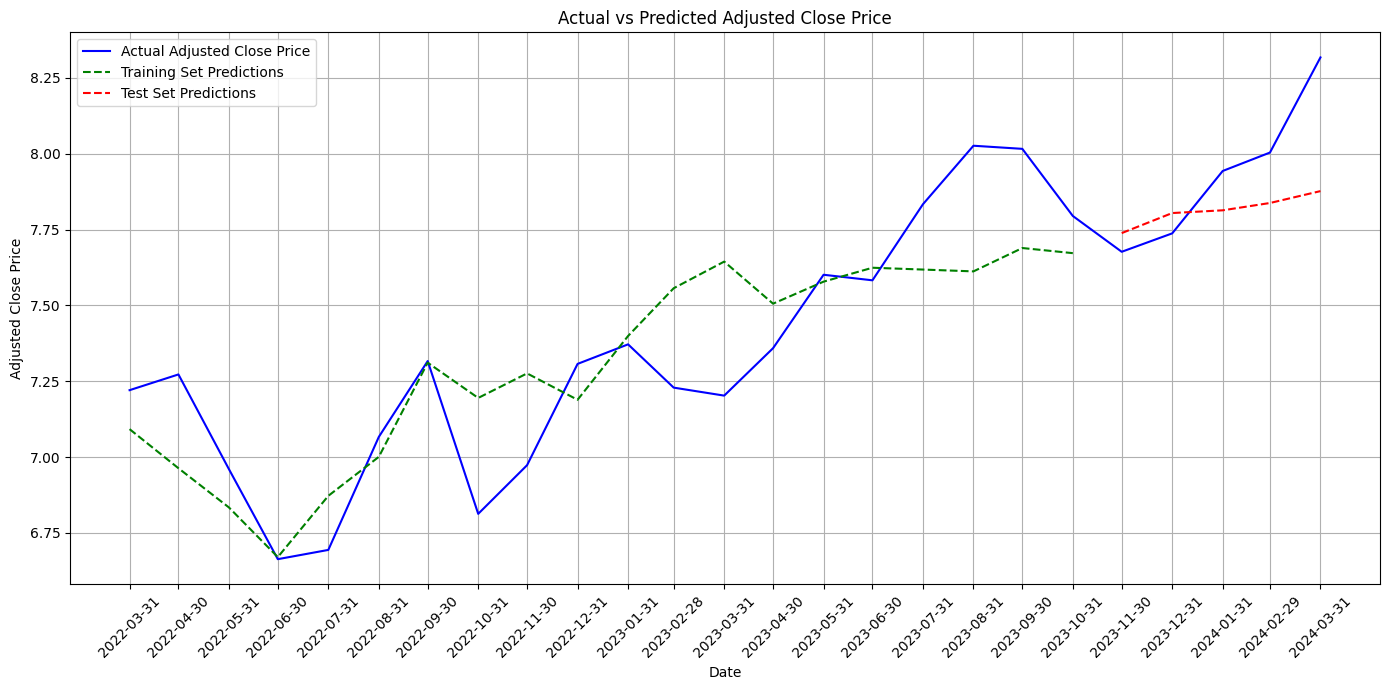

In [57]:
# Define the features and target
X = df_cen[['Interest Rate', 'Expected 1 Year Interest Rate', 'CEN.NZ_x']]
y = df_cen['CEN.NZ_y']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=False)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Add the predictions to the dataframe for easy plotting
df_cen['Train_Prediction'] = np.nan
df_cen['Test_Prediction'] = np.nan

df_cen.loc[X_train.index, 'Train_Prediction'] = y_train_pred
df_cen.loc[X_test.index, 'Test_Prediction'] = y_test_pred

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(df_cen['Date'], df_cen['CEN.NZ_y'], label='Actual Adjusted Close Price', color='blue')
plt.plot(df_cen['Date'], df_cen['Train_Prediction'], label='Training Set Predictions', linestyle='--', color='green')
plt.plot(df_cen['Date'], df_cen['Test_Prediction'], label='Test Set Predictions', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Actual vs Predicted Adjusted Close Price')
plt.legend()
plt.grid(True)

# Ensure all dates are displayed on x-axis without skipping
plt.xticks(df_cen['Date'], rotation=45)

plt.tight_layout()
plt.show()

## Coefficients and Score for CEN.NZ

In [42]:
## Coefficients and Score
# Print the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_test_pred))
print("R^2 Score:", r2_score(y_test, y_test_pred))

Coefficients: [-0.50263724  0.90130502  0.10779405]
Intercept: 5.990430611528593
Mean Squared Error: 0.049377190453878964
R^2 Score: 0.038297961220031373


# Multiple Linear Regression of GNE Stock

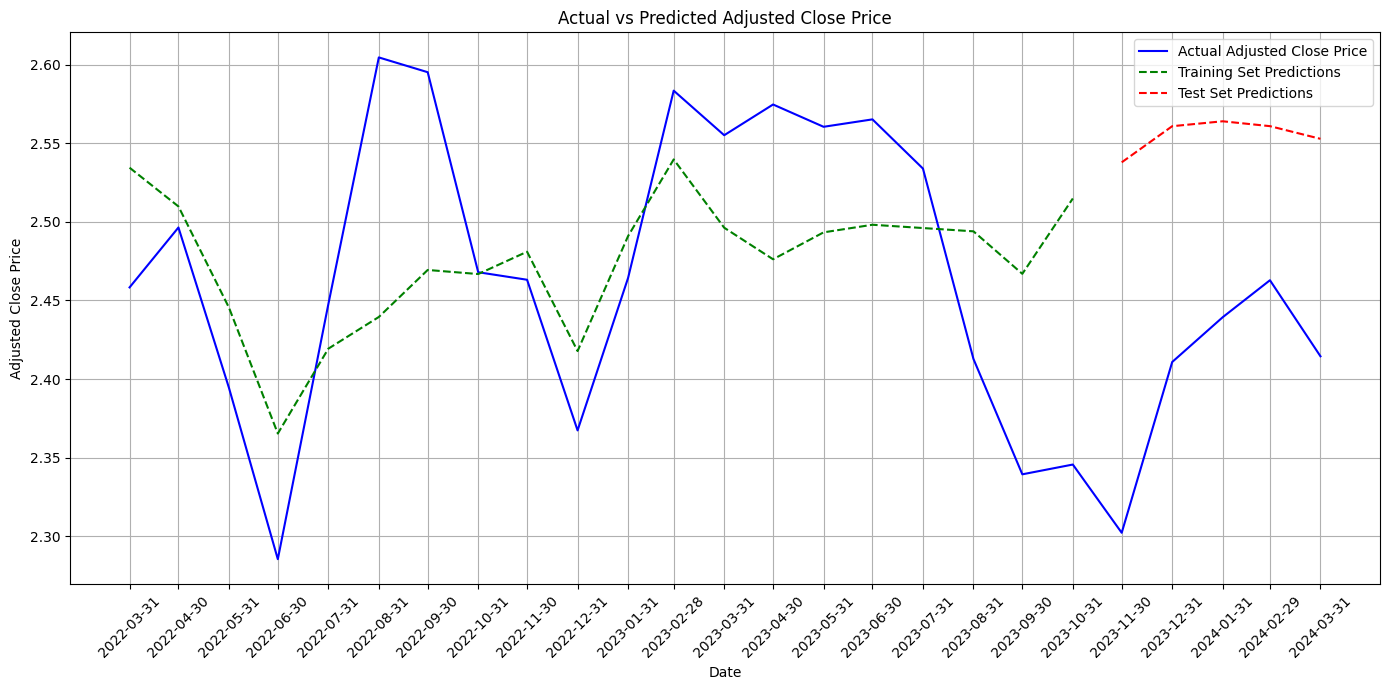

In [43]:
# Define the features and target
X_gne = df_gne[['Interest Rate', 'Expected 1 Year Interest Rate', 'GNE.NZ_x']]
y_gne = df_gne['GNE.NZ_y']

# Split the data into training and test sets
X_train_gne, X_test_gne, y_train_gne, y_test_gne = train_test_split(X_gne, y_gne, test_size=0.2, shuffle=False)

# Initialize and train the model
model_gne = LinearRegression()
model_gne.fit(X_train_gne, y_train_gne)

# Make predictions
y_train_pred_gne = model_gne.predict(X_train_gne)
y_test_pred_gne = model_gne.predict(X_test_gne)

# Add the predictions to the dataframe for easy plotting
df_gne['Train_Prediction'] = np.nan
df_gne['Test_Prediction'] = np.nan

df_gne.loc[X_train_gne.index, 'Train_Prediction'] = y_train_pred_gne
df_gne.loc[X_test_gne.index, 'Test_Prediction'] = y_test_pred_gne

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(df_gne['Date'], df_gne['GNE.NZ_y'], label='Actual Adjusted Close Price', color='blue')
plt.plot(df_gne['Date'], df_gne['Train_Prediction'], label='Training Set Predictions', linestyle='--', color='green')
plt.plot(df_gne['Date'], df_gne['Test_Prediction'], label='Test Set Predictions', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Actual vs Predicted Adjusted Close Price')
plt.legend()
plt.grid(True)

# Ensure all dates are displayed on x-axis without skipping
plt.xticks(df_gne['Date'], rotation=45)

plt.tight_layout()
plt.show()

## Coefficients and Score for GNE.NZ

In [44]:
## Coefficients and Score
# Print the coefficients
print("Coefficients:", model_gne.coef_)
print("Intercept:", model_gne.intercept_)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test_gne, y_test_pred_gne))
print("R^2 Score:", r2_score(y_test_gne, y_test_pred_gne))

Coefficients: [-0.23171765  0.31357848 -0.07087769]
Intercept: 2.2423736454412713
Mean Squared Error: 0.024479424128829964
R^2 Score: -7.040485206968842


# Multiple Linear Regression of MCY Stock

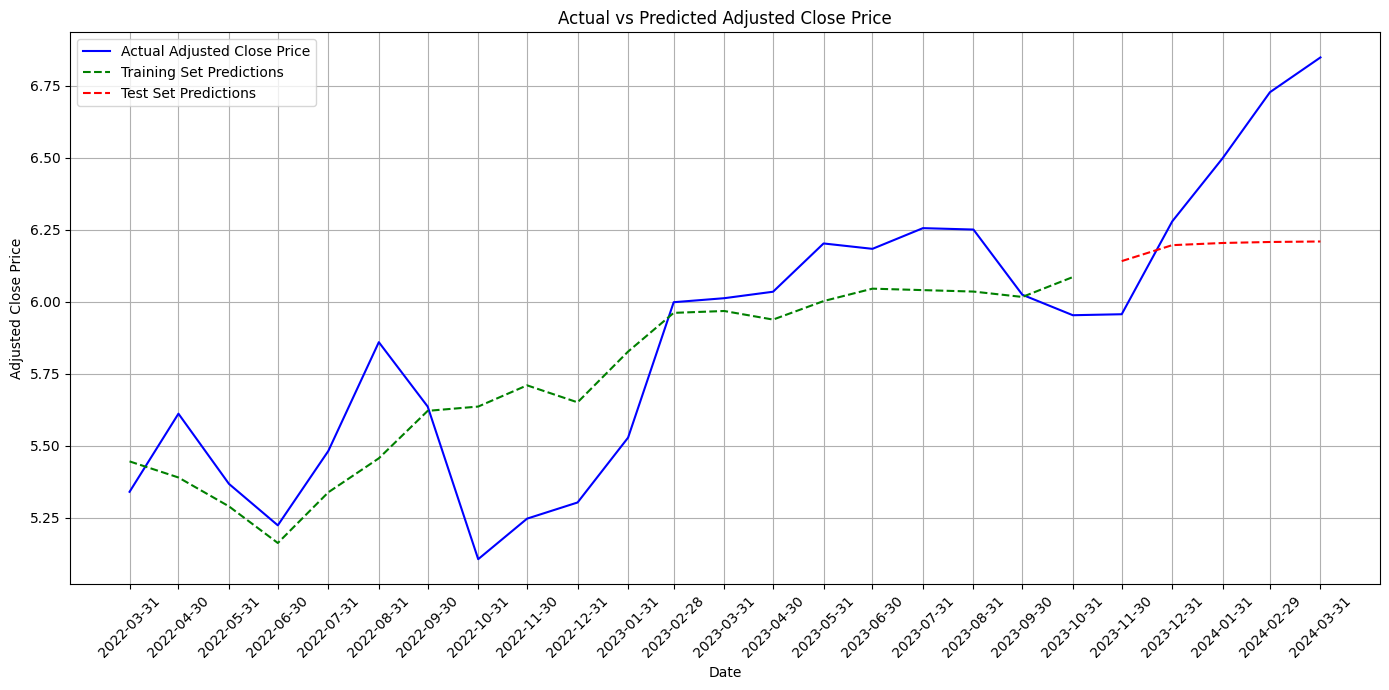

In [45]:
# Define the features and target
X_mcy = df_mcy[['Interest Rate', 'Expected 1 Year Interest Rate', 'MCY.NZ_x']]
y_mcy = df_mcy['MCY.NZ_y']

# Split the data into training and test sets
X_train_mcy, X_test_mcy, y_train_mcy, y_test_mcy = train_test_split(X_mcy, y_mcy, test_size=0.2, shuffle=False)

# Initialize and train the model
model_mcy = LinearRegression()
model_mcy.fit(X_train_mcy, y_train_mcy)

# Make predictions
y_train_pred_mcy = model_mcy.predict(X_train_mcy)
y_test_pred_mcy = model_mcy.predict(X_test_mcy)

# Add the predictions to the dataframe for easy plotting
df_mcy['Train_Prediction'] = np.nan
df_mcy['Test_Prediction'] = np.nan

df_mcy.loc[X_train_mcy.index, 'Train_Prediction'] = y_train_pred_mcy
df_mcy.loc[X_test_mcy.index, 'Test_Prediction'] = y_test_pred_mcy

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(df_mcy['Date'], df_mcy['MCY.NZ_y'], label='Actual Adjusted Close Price', color='blue')
plt.plot(df_mcy['Date'], df_mcy['Train_Prediction'], label='Training Set Predictions', linestyle='--', color='green')
plt.plot(df_mcy['Date'], df_mcy['Test_Prediction'], label='Test Set Predictions', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Actual vs Predicted Adjusted Close Price')
plt.legend()
plt.grid(True)

# Ensure all dates are displayed on x-axis without skipping
plt.xticks(df_mcy['Date'], rotation=45)

plt.tight_layout()
plt.show()

## Coefficients and Score for MCY.NZ

In [46]:
## Coefficients and Score
# Print the coefficients
print("Coefficients:", model_mcy.coef_)
print("Intercept:", model_mcy.intercept_)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test_mcy, y_test_pred_mcy))
print("R^2 Score:", r2_score(y_test_mcy, y_test_pred_mcy))

Coefficients: [-0.39709604  0.75497814 -0.03127429]
Intercept: 4.545191240977709
Mean Squared Error: 0.161147752826145
R^2 Score: -0.5812814907791908


# Multiple Linear Regression of MEL Stock

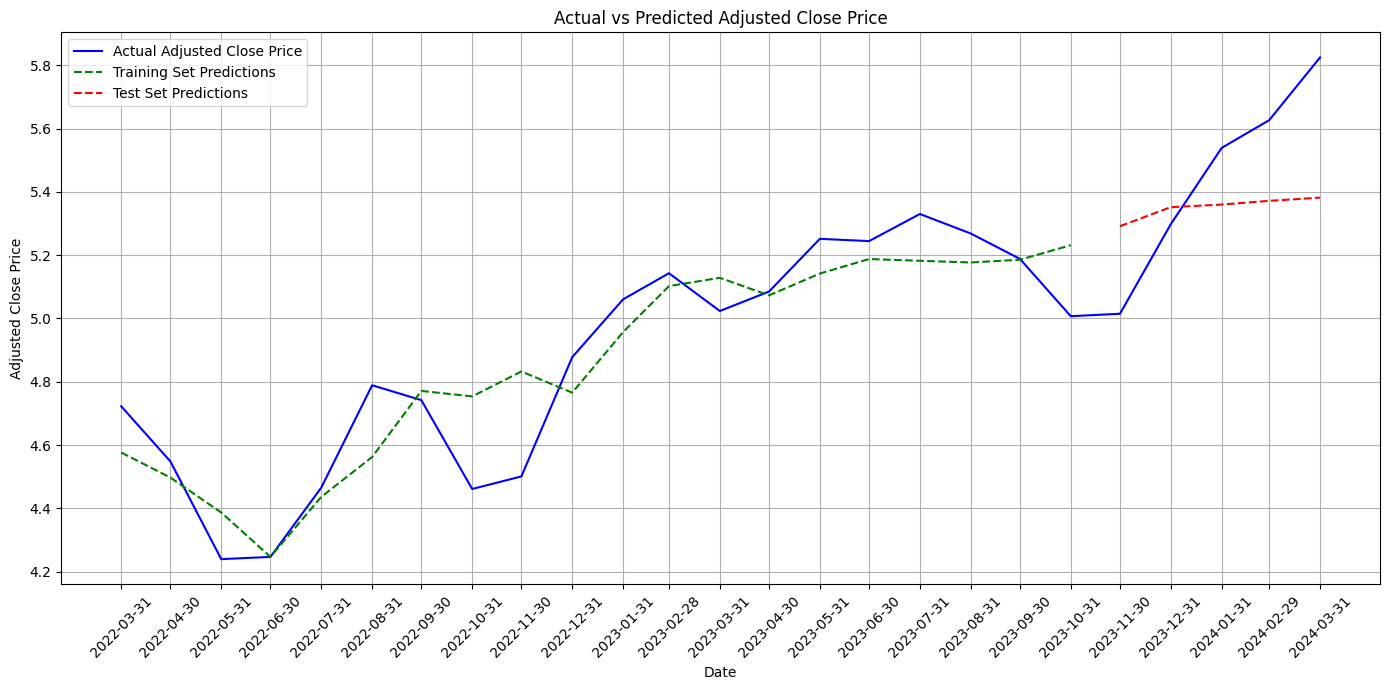

In [47]:
# Define the features and target
X_mel = df_mel[['Interest Rate', 'Expected 1 Year Interest Rate', 'MEL.NZ_x']]
y_mel = df_mel['MEL.NZ_y']

# Split the data into training and test sets
X_train_mel, X_test_mel, y_train_mel, y_test_mel = train_test_split(X_mel, y_mel, test_size=0.2, shuffle=False)

# Initialize and train the model
model_mel = LinearRegression()
model_mel.fit(X_train_mel, y_train_mel)

# Make predictions
y_train_pred_mel = model_mel.predict(X_train_mel)
y_test_pred_mel = model_mel.predict(X_test_mel)

# Add the predictions to the dataframe for easy plotting
df_mel['Train_Prediction'] = np.nan
df_mel['Test_Prediction'] = np.nan

df_mel.loc[X_train_mel.index, 'Train_Prediction'] = y_train_pred_mel
df_mel.loc[X_test_mel.index, 'Test_Prediction'] = y_test_pred_mel

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(df_mel['Date'], df_mel['MEL.NZ_y'], label='Actual Adjusted Close Price', color='blue')
plt.plot(df_mel['Date'], df_mel['Train_Prediction'], label='Training Set Predictions', linestyle='--', color='green')
plt.plot(df_mel['Date'], df_mel['Test_Prediction'], label='Test Set Predictions', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Actual vs Predicted Adjusted Close Price')
plt.legend()
plt.grid(True)

# Ensure all dates are displayed on x-axis without skipping
plt.xticks(df_mel['Date'], rotation=45)

plt.tight_layout()
plt.show()

## Multiple Linear Regression Analysis with Walk-Forward Validation

In [48]:
# train_months = 5 # Number of months to train
# test_months = 1 # Number of months to test

# results = []

# for i in range(len(df_cen) - train_months - test_months + 1):
#     # define the training and testing data
#     train_start = i
#     train_end = i + train_months
#     test_start = train_end
#     test_end = test_start + test_months

#     x_train = df_cen.iloc[train_start:train_end][['Interest Rate', 'Expected 1 Year Interest Rate','CEN.NZ_x']]
#     y_train = df_cen.iloc[train_start:train_end]['CEN.NZ_y']
#     X_test = df_cen.iloc[test_start:test_end][['Interest Rate', 'Expected 1 Year Interest Rate','CEN.NZ_x']]
#     Y_test = df_cen.iloc[test_start:test_end]['CEN.NZ_y']

#     # Initialize and train the model
#     model = LinearRegression()
#     model.fit(x_train, y_train)

#     # Make Prediction
#     y_pred = model.predict(X_test)

#     mse = mean_squared_error(Y_test, y_pred)

#     # Store coefficients
#     coefficients = model.coef_
#     intercept = model.intercept_

#     # Print or store the results for each iteration
#     print(f'Iteration {i+1}:')
#     print(f'Mean Squared Error: {mse}')
#     print(f'Coefficients: {coefficients}')
#     print(f'Intercept: {intercept}')
#     print()

#     # Store results for further analysis if needed
#     results.append({
#         'Iteration': i+1,
#         'MSE': mse,
#         'Coefficients': coefficients,
#         'Intercept': intercept
#     })